# Task 2 : Prediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. Use R or Python or perform this task. 
Dataset: https://bit.ly/3kXTdox

# Shreya Tangri 

The data given to unsupervised algorithms is not labelled, which means only the input variables (x) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to discover interesting structures in the data on their own.

# Importing the libraries 

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Importing the Dataset Files 

In [248]:
Get_Data=pd.read_csv("Iris.csv")

In [249]:
Get_Data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [250]:
Get_Data.shape

(150, 6)

In [251]:
Get_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [252]:
Get_Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [253]:
Get_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


Now, we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called 'x' so that we can train our model with these features. For this, we use the 'iloc' function on df, and the column index (0,1,2,3) for the above four columns are used, as shown below:

In [254]:
x = Get_Data.iloc[:, [0,1,2,3]].values

In [255]:
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

# Data Visualization

# Scatter Plot

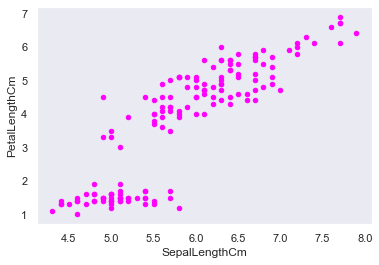

In [256]:
Get_Data.plot(kind ="scatter", x ='SepalLengthCm', y ='PetalLengthCm', color='magenta') 
plt.grid() 

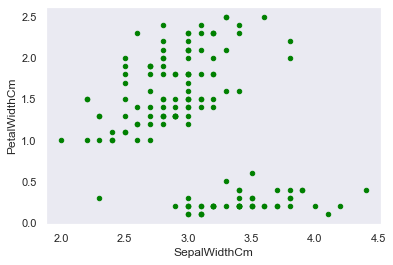

In [257]:
Get_Data.plot(kind ="scatter", x ='SepalWidthCm', y ='PetalWidthCm', color='green') 
plt.grid() 

<function matplotlib.pyplot.show(close=None, block=None)>

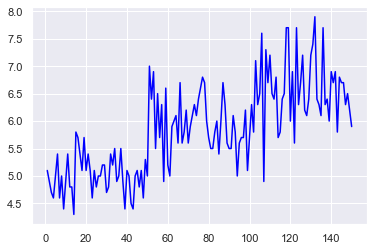

In [265]:
plt.plot(Get_Data.Id, Get_Data["SepalLengthCm"], color = 'blue') 
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

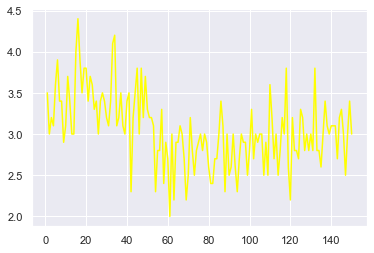

In [266]:
plt.plot(Get_Data.Id, Get_Data["SepalWidthCm"], color = 'yellow') 
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

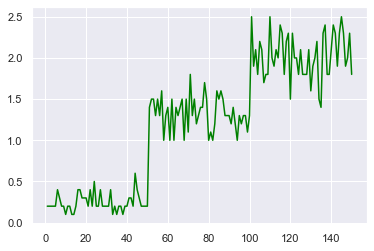

In [267]:
plt.plot(Get_Data.Id, Get_Data["PetalWidthCm"], color = 'green') 
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

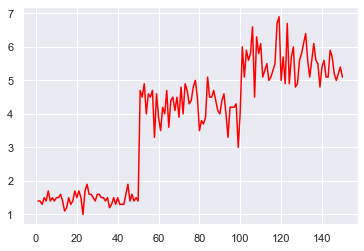

In [268]:
plt.plot(Get_Data.Id, Get_Data["PetalLengthCm"], color = 'red') 
plt.show 

# DisPlot

/Users/shreyatangri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

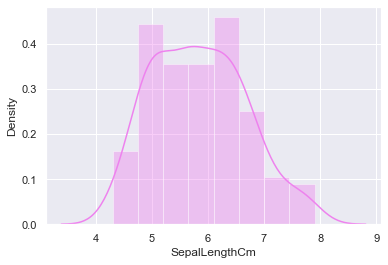

In [273]:
sns.distplot(Get_Data['SepalLengthCm'], color = 'violet')

/Users/shreyatangri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

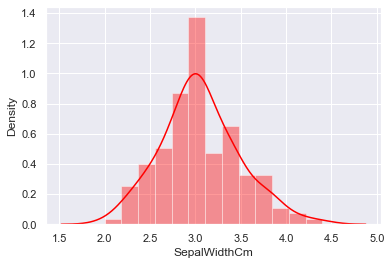

In [271]:
sns.distplot(Get_Data['SepalWidthCm'], color = 'red')

/Users/shreyatangri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

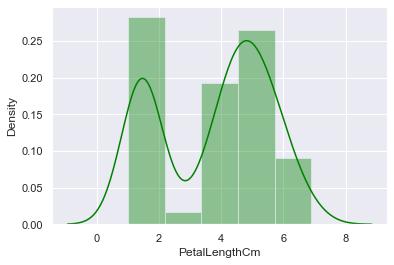

In [272]:
sns.distplot(Get_Data['PetalLengthCm'], color = 'green')

/Users/shreyatangri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

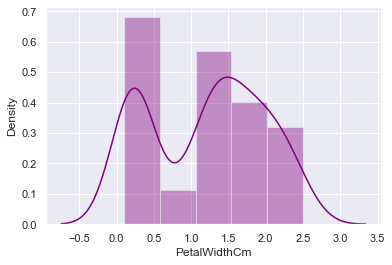

In [275]:
sns.distplot(Get_Data['PetalWidthCm'], color = 'purple')

# Pairplot

/Users/shreyatangri/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


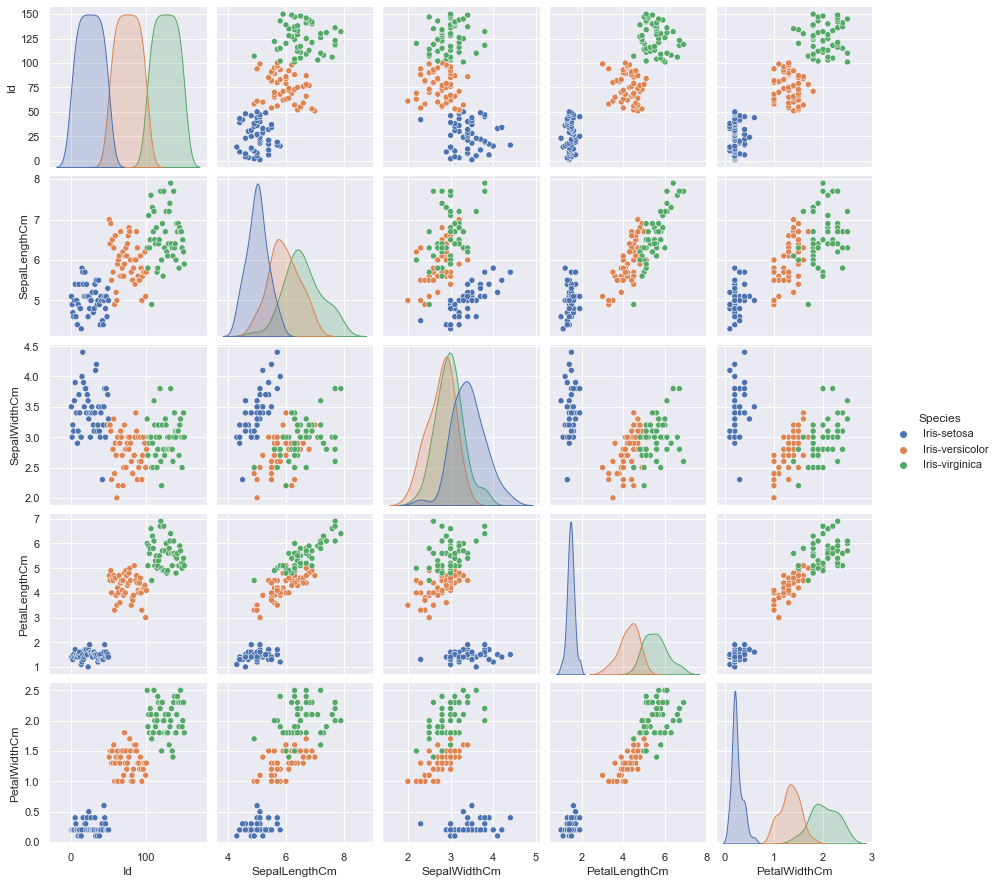

In [276]:
sns.pairplot(Get_Data, hue='Species', size=2.5)

# Boxplot

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

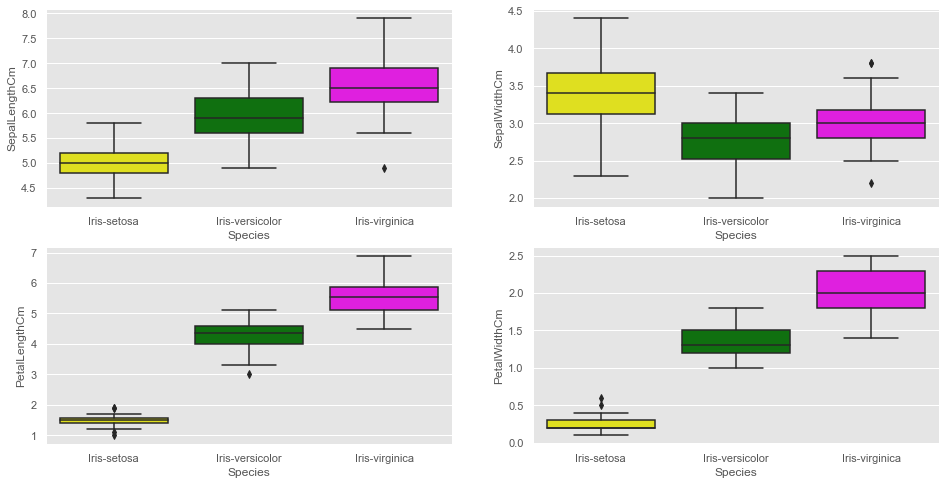

In [278]:
# Plotting the features using boxes
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
my_choice = {"Iris-versicolor": "green", "Iris-setosa": "yellow", "Iris-virginica":"magenta"}
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = Get_Data, palette = my_choice)
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = Get_Data, palette = my_choice)
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = Get_Data, palette = my_choice)
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = Get_Data, palette = my_choice)

# Violin Plots

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

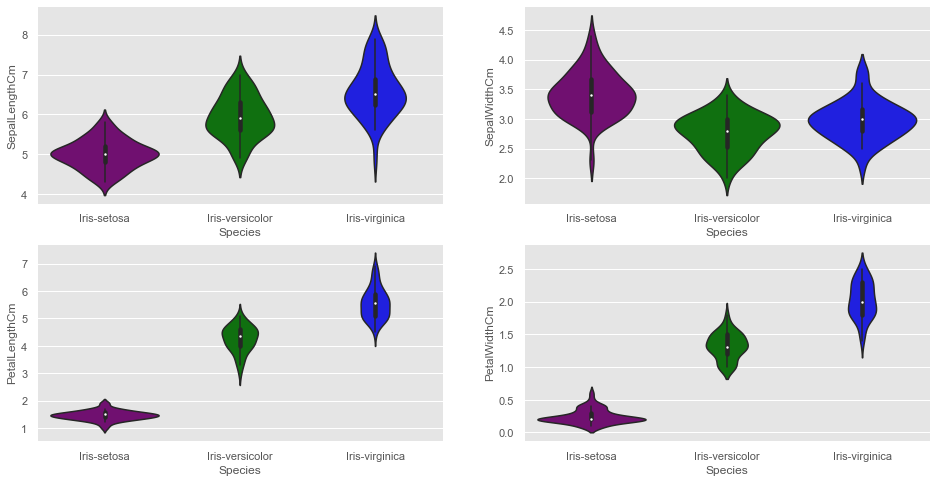

In [284]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
my_choice = {"Iris-versicolor": "green", "Iris-setosa": "purple", "Iris-virginica":"blue"}
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = Get_Data, palette = my_choice)
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = Get_Data, palette = my_choice)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = Get_Data, palette = my_choice)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = Get_Data, palette = my_choice)

# lmplot() function in seaborn

<Figure size 648x360 with 0 Axes>

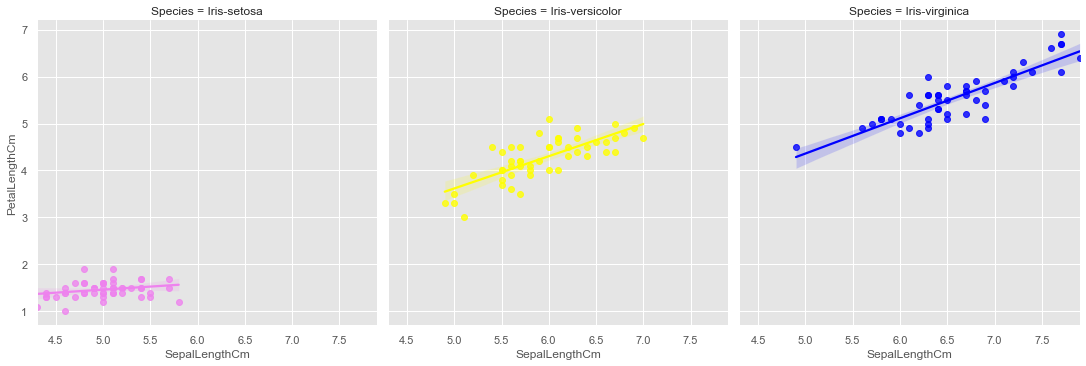

<Figure size 648x360 with 0 Axes>

In [285]:
my_pal = {"Iris-versicolor": "yellow", "Iris-setosa": "violet", "Iris-virginica":"blue"}
sns.lmplot(x = 'SepalLengthCm', y = 'PetalLengthCm', data = Get_Data, hue = 'Species', col = 'Species', palette = my_pal)
plt.figure(figsize=(9, 5))

<Figure size 648x360 with 0 Axes>

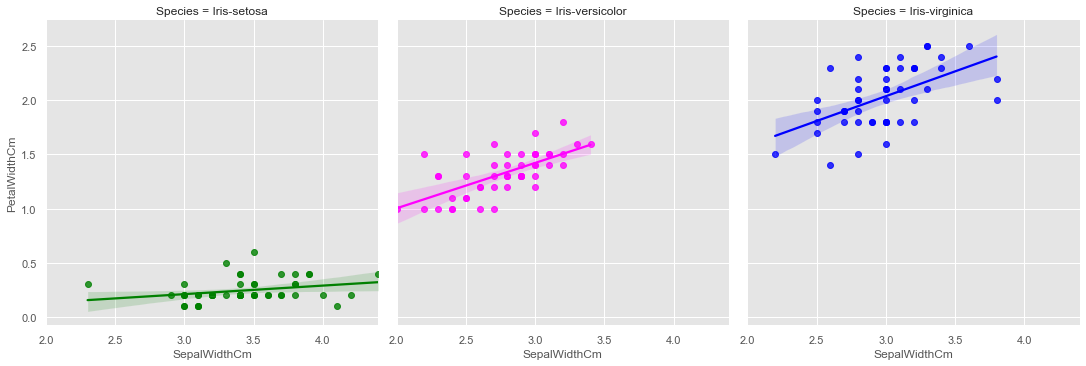

<Figure size 648x360 with 0 Axes>

In [286]:
my_pal = {"Iris-versicolor": "magenta", "Iris-setosa": "green", "Iris-virginica":"blue"}
sns.lmplot(x = 'SepalWidthCm', y = 'PetalWidthCm', data = Get_Data, hue = 'Species', col = 'Species', palette = my_pal)
plt.figure(figsize=(9, 5))

# Stripplot

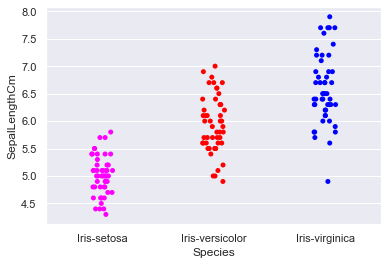

In [287]:
sns.set(style="darkgrid")
my_choice = {"Iris-versicolor": "red", "Iris-setosa": "magenta", "Iris-virginica":"blue"}
ax = sns.stripplot(x='Species', y='SepalLengthCm', data=Get_Data, palette = my_choice)

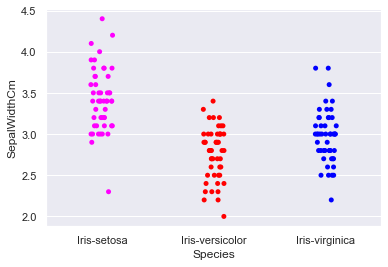

In [288]:
sns.set(style="darkgrid")
my_choice = {"Iris-versicolor": "red", "Iris-setosa": "magenta", "Iris-virginica":"blue"}
ax = sns.stripplot(x='Species', y='SepalWidthCm', data=Get_Data, palette = my_choice)

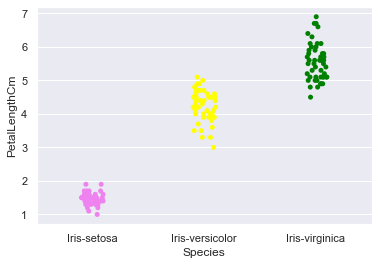

In [289]:
sns.set(style="darkgrid")
my_choice = {"Iris-versicolor": "yellow", "Iris-setosa": "violet", "Iris-virginica":"green"}
ax = sns.stripplot(x='Species', y='PetalLengthCm', data=Get_Data, palette = my_choice)

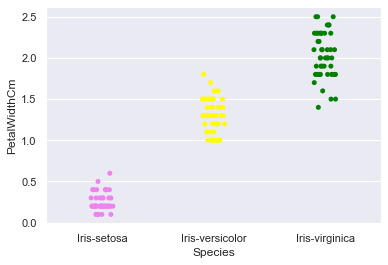

In [290]:
sns.set(style="darkgrid")
my_choice = {"Iris-versicolor": "yellow", "Iris-setosa": "violet", "Iris-virginica":"green"}
ax = sns.stripplot(x='Species', y='PetalWidthCm', data=Get_Data, palette = my_choice)

# Finding the Optimum number of clusters for K Means

In [291]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [292]:
wcss

[281831.54466666654,
 70581.3808,
 31320.711199999994,
 17762.657226173542,
 11423.238080088988,
 7909.5306730769225,
 5881.448116883118,
 4562.780079365082,
 3579.7205612745106,
 2968.4914326653743]

# Plotting the results onto a line graph, allowing us to observe 'The elbow' graph

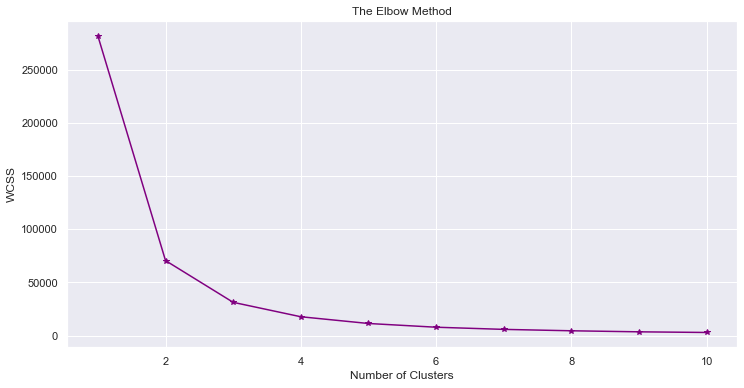

In [293]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
plt.plot(range(1, 11), wcss, marker='*', color= 'purple')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()

Now since, we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

# Applying kmeans to the dataset

In [294]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [295]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# y_prediction = km.fit_predict(Get_Data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
# y_prediction

In [296]:
y_kmeans 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [297]:
kmeans

KMeans(n_clusters=3, random_state=0)

In [298]:
Get_Data['Cluster'] = y_kmeans 
Get_Data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1


# Visualizing the Clusters

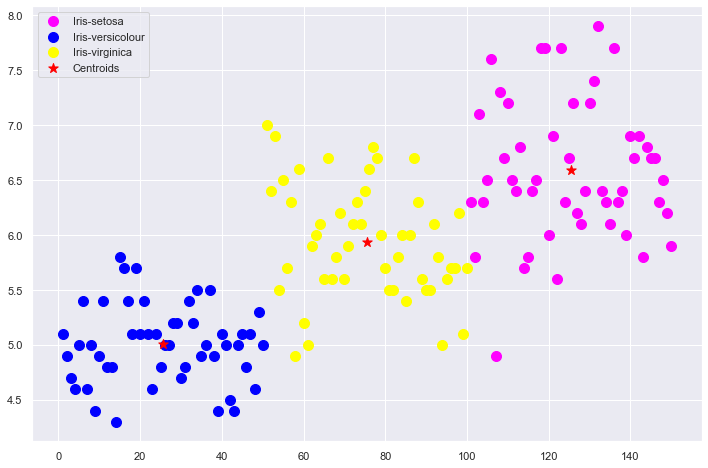

In [299]:
plt.figure(figsize=(12, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'magenta', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', marker = '*', label = 'Centroids')
plt.legend()

# Thank You